<a href="https://colab.research.google.com/github/subhayuroy/Melbourne_HousingAnalysis/blob/master/HousingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

Read the Iowa data file into a Pandas DataFrame called home_data.

In [ ]:
import pandas as pd

# Path of the file to read
iowa_file_path = 'melb_data.csv'
# Read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

In [ ]:
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
home_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
So, we will take the simplest option for now, and drop houses from our data.

In [ ]:
home_data = home_data.dropna(axis=0)

#Selecting The Prediction Target

In [ ]:
y = home_data.Price

#Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features."

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = home_data[melbourne_features]

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


#Building your Model

1)**Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.

2)**Fit:** Capture patterns from provided data. This is the heart of modeling.

3)**Predict:** Just what it sounds like

4)**Evaluate:** Determine how accurate the model's predictions are.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)
# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
print("The predictions are")
print(melbourne_model.predict(X.head()))

The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [ ]:
melbourne_model.predict(X.head())

array([1035000., 1465000., 1600000., 1876000., 1636000.])

#Model Validation

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

#The Problem with "In-Sample" Scores

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor(random_state=1)
# Fit model
melbourne_model.fit(X_train, y_train)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(X_valid)
print(mean_absolute_error(y_valid, val_predictions))

273518.01872175594


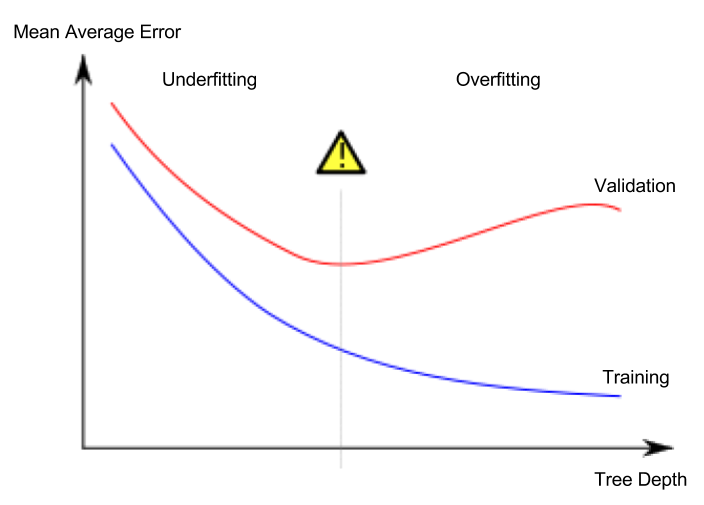

#Experimenting With Different Models

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds_val)
    return mae

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_valid, y_train, y_valid)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


Of the options listed, *500* is the **optimal number of leaves**.

#RANDOM FORESTS

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, melb_preds))

207190.6873773146


#Conclusion

There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

1) **A Simple Option:** Drop Columns with Missing Values

2) **A Better Option:** Imputation

3) **An Extension To Imputation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

#Score from Approach 1 (Drop Columns with Missing Values)

In [ ]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
215038.14009038088


#Score from Approach 2 (Imputation)

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
215038.14009038088


#Score from Approach 3 (An Extension to Imputation)

In [ ]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
215038.14009038088


As we can see, all the 3 Approaches performed properly. This indicates *no missing Data*.

So, lets confirm it.

In [ ]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(4647, 5)
Series([], dtype: int64)


Thus, we can see **no Data is missing**.

Let's change our feature to see the changes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('melb_data.csv')

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [ ]:
# Approach 1
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)
print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

print('-------------------------------------------------------------------------------')

#Approach 2
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

print('-------------------------------------------------------------------------------')

# Approach 3
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns
print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

print('-------------------------------------------------------------------------------\n\n')

#Printing the Missing Data
print(X_train.shape)
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MAE from Approach 1 (Drop columns with missing values):
183550.22137772635
-------------------------------------------------------------------------------
MAE from Approach 2 (Imputation):
178166.46269899711
-------------------------------------------------------------------------------
MAE from Approach 3 (An Extension to Imputation):
178927.503183954
-------------------------------------------------------------------------------


(10864, 12)
Car               49
BuildingArea    5156
YearBuilt       4307
dtype: int64


As we can see, Approach 3 performed **slightly worse than** Approach 2.

**So, why did imputation perform better than dropping the columns?**

The training data has 10864 rows and 12 columns, where three columns contain missing data. For each column, less than half of the entries are missing. Thus, dropping the columns removes a lot of useful information, and so it makes sense that imputation would perform better.

# *Categorical Variables*
A categorical variable takes only a limited number of values.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('train.csv', index_col='Id') 
X_test = pd.read_csv('test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [2]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,48,0,1774,1822,GasA,Ex,Y,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,3,774,Y,0,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,0,0,894,894,GasA,Gd,N,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,1,308,Y,0,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,TA,Gd,BrkTil,713,0,163,876,GasA,Ex,Y,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,2,432,Y,0,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,Gd,TA,PConc,1218,0,350,1568,GasA,Ex,Y,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,3,857,Y,150,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,1541,1541,GasA,Ex,Y,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,3,843,Y,468,81,0,0,0,0,0,1,2006,WD,Normal


The dataset contains both **numerical** and **categorical** variables.  
There is need to encode the categorical data before training a model.

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

**Step 1: Drop columns with categorical data**

In [4]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17837.82570776256


**Step 2: Label encoding**

In [5]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


In [6]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['HeatingQC', 'Functional', 'Exterior1st', 'ExterCond', 'LandSlope', 'Condition2', 'Heating', 'RoofMatl', 'Foundation', 'Utilities', 'Exterior2nd', 'RoofStyle', 'SaleType', 'Condition1', 'Neighborhood']


In [7]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder 
label_encoder = LabelEncoder()
for col in set(good_label_cols):
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
17575.291883561644


**Step 3: Investigating cardinality**

In [8]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

How many categorical variables in the training data have cardinality greater than 10?

*high_cardinality_numcols = 3*

How many columns are needed to one-hot encode the 'Neighborhood' variable in the training data?

*num_cols_neighborhood = 25*

How many entries are added to the dataset by replacing the column with a one-hot encoding?

OH_entries_added = 1e4*100 - 1e4

How many entries are added to the dataset by replacing the column with a label encoding?

*label_entries_added = 0*

**Step 4: One-hot encoding**

In [9]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [10]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

OH_cols_train.index= X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17525.345719178084


**Conclusion**

In this case, dropping the categorical columns (Approach 1) performed worst, since it had the highest MAE score. As for the other two approaches, since the returned MAE scores are so close in value, there doesn't appear to be any meaningful benefit to one over the other.

In general, one-hot encoding (Approach 3) will typically perform best, and dropping the categorical columns (Approach 1) typically performs worst, but it varies on a case-by-case basis.